<a href="https://colab.research.google.com/github/NegarTajziyehchi/Data_Science_Projects/blob/main/NLP_Amazon_Review/Amazon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Amazon Review/Dataset")

In [4]:
!ls

cleaned_data.csv       clean_train_data.csv  test_data.csv
cleaned_test_data.csv  readme.txt	     train.csv
clean_test_data.csv    test.csv		     train_data.csv


In [5]:
# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries for text preprocessing
import string
import nltk
import unicodedata  # Import the unicodedata library for handling unicode characters
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

### Load the data


In [6]:
# train_df = pd.read_csv('train.csv',header= None)
train_df = pd.read_csv('train.csv', header=None, nrows=500)
train_df.rename(columns={0: 'rate', 1: 'title', 2: 'review'}, inplace=True)

In [7]:
train_df[:5]

,rate,title,review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [8]:
train_df['rate'].unique()

array([3, 5, 4, 1, 2])

In [213]:
# test_df = pd.read_csv('test.csv',header= None)
test_df = pd.read_csv('test.csv',header= None, nrows=500)
test_df.rename(columns={0: 'rate', 1: 'title', 2: 'review'}, inplace=True)

In [214]:
test_df[:5]

,rate,title,review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [215]:
# Display basic statistics of numerical columns ('rate' column)
print("Summary Statistics:")
print(train_df['rate'].describe())

Summary Statistics:
count    500.000000
mean       3.168000
std        1.409876
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rate, dtype: float64


In [216]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rate    500 non-null    int64 
 1   title   500 non-null    object
 2   review  500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [217]:
# Count the number of reviews in each sentiment rating category
class_counts = train_df['rate'].value_counts()

# Calculate the class distribution in percentages
class_percentages = (class_counts / train_df.shape[0]) * 100
class_percentages = class_percentages.round().astype(int).astype(str) + "%"

# Display the class distribution
print("Class Distribution (Percentage):")
print(class_percentages)



Class Distribution (Percentage):
5    24%
3    22%
4    20%
2    18%
1    17%
Name: rate, dtype: object


In [218]:
train_df.shape

(500, 3)

In [219]:
test_df.shape

(500, 3)

In [220]:
# Display a few sample reviews for each sentiment rating
for rate in range(1, 6):
    sample_reviews = train_df[train_df['rate'] == rate].sample(5)
    print(f"\nSample Reviews for Sentiment Rating {rate}:")
    for index, row in sample_reviews.iterrows():
        print(f"Review Title: {row['title']}")
        print(f"Review Text: {row['review']}\n")


Sample Reviews for Sentiment Rating 1:
Review Title: super wack
Review Text: just like No-Limit Cash Money has no shame at putting out garbage music.wack beats and no lyric ryhmes.who is buying this crab? all the stuff sounds the same and it's not that average.it's all bad.

Review Title: Don't buy from Eforcity -- slow, disingenuous
Review Text: What am I reviewing here... this gizmo or the supplier, Eforcity? I never received this product after my order! After waiting and waiting I contacted Eforcity several times -- no reply. After a nasty letter from me Eforcity'r reply feigned lacking information about my mailing address!What a cop-out.I told them I would not pay for it, so Eforcity said they'd give me a refund, which has not come to me yet. I bought another product to replace this from Amazon which arrived quickly from Amazon.

Review Title: I got fooled...
Review Text: I did not know this was the audio cd of the game, I thought it could be used on the playstation. Maybe the oth

In [221]:
# Check for missing values in the trainset
missing_data = train_df.isnull().sum()
print('missing_data: ',missing_data)

missing_data:  rate      0
title     0
review    0
dtype: int64


In [222]:
# Check for missing values in the testset
missing_data = test_df.isnull().sum()
print('missing_data: ',missing_data)

missing_data:  rate      0
title     0
review    0
dtype: int64


- **Dataset Size:** The dataset includes 3,000,000 training observations and 650,000 testing observations.

- **Features:** Three main features are available: 'rate,' 'title,' and 'reviews.'

- **Missing Values:** In the training dataset, 76 titles are missing, and in the test dataset, 12 titles are missing.

- **Balanced Distribution:** Each sentiment rating (1 to 5) represents approximately 20% of the dataset.

- **Feature Focus:** To expedite processing due to the dataset's size, I've opted to use only the 'reviews' feature, omitting the 'title.'


### Pre-processing

In [223]:
train_df.drop('title',inplace =True, axis =1)
test_df.drop('title',inplace =True, axis =1)

In [224]:
train_df[:5]

,rate,review
0,3,Gave this to my dad for a gag gift after direc...
1,5,I hope a lot of people hear this cd. We need m...
2,5,I'm reading a lot of reviews saying that this ...
3,4,The music of Yasunori Misuda is without questi...
4,5,Probably the greatest soundtrack in history! U...


In [225]:
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
from textblob import Word

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer
import string
import unicodedata
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove unicode characters
    text = ''.join([char for char in text if not unicodedata.category(char).startswith('P')])

    # Tokenization (split text into words)
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Remove repetitive letters in words
    rx = re.compile(r'([^\W\d_])\1{2,}')
    lemmatized_tokens = [re.sub(r'[^\W\d_]+', lambda x: Word(rx.sub(r'\1\1', x.group())).correct() if rx.search(x.group()) else x.group(), word) for word in lemmatized_tokens]

    # Keep only words which are longer than 2 letters for filtered_text and create the 'clean_text' by joining selected tokens
    clean_text = ' '.join([item for item in lemmatized_tokens if len(item) > 2])

    return clean_text

In [228]:
train_df['clean_review'] = train_df['review'].apply(preprocess_text)

In [229]:
train_df[:5]

,rate,review,clean_review
0,3,Gave this to my dad for a gag gift after direc...,gave dad gag gift directing nunsense got reall...
1,5,I hope a lot of people hear this cd. We need m...,hope lot people hear need strong positive vibe...
2,5,I'm reading a lot of reviews saying that this ...,reading lot review saying best game soundtrack...
3,4,The music of Yasunori Misuda is without questi...,music yasunori misuda without question close s...
4,5,Probably the greatest soundtrack in history! U...,probably greatest soundtrack history usually b...


In [230]:
# Save train_df to a CSV file
train_df.to_csv('clean_train_data.csv', index=False)

In [231]:
test_df['clean_review'] = train_df['review'].apply(preprocess_text)

In [232]:
test_df[:5]

,rate,review,clean_review
0,1,"This model may be ok for sedentary types, but ...",gave dad gag gift directing nunsense got reall...
1,4,This is a fast read filled with unexpected hum...,hope lot people hear need strong positive vibe...
2,2,I bought one of these chargers..the instructio...,reading lot review saying best game soundtrack...
3,2,I was excited to find a book ostensibly about ...,music yasunori misuda without question close s...
4,2,"I am a big JVC fan, but I do not like this mod...",probably greatest soundtrack history usually b...


In [233]:
# Save test_df to a CSV file
test_df.to_csv('clean_test_data.csv', index=False)


### Load Pre-processed Data

In [10]:
train_df = pd.read_csv('clean_train_data.csv')
test_df = pd.read_csv('clean_test_data.csv')

In [11]:
# train_df

In [12]:
train_df['clean_review'].isnull().sum()

0

In [13]:
# Remove rows with null values in a specific column, e.g., 'clean_review'
train_df = train_df.dropna(subset=['clean_review'])

# After removal, you might want to reset the index of the DataFrame
train_df.reset_index(drop=True, inplace=True)

In [14]:
# Get rows with null values in a specific column, e.g., 'clean_review'
null_rows = train_df[train_df['clean_review'].isnull()]

# Alternatively, you can use 'isna()'
# null_rows = train_df[train_df['clean_review'].isna()]

# Display the rows with null values
print(null_rows)

Empty DataFrame
Columns: [rate, review, clean_review]
Index: []


In [15]:
train_df[:2]

,rate,review,clean_review
0,3,Gave this to my dad for a gag gift after direc...,gave dad gag gift directing nunsense got reall...
1,5,I hope a lot of people hear this cd. We need m...,hope lot people hear need strong positive vibe...


In [16]:
# nltk.download('punkt')

In [17]:
# from nltk.probability import FreqDist
# #Create a list of all words
# all_words_train = ' '.join([word for word in train_df['clean_review']])
# #Tokenize all_words
# tokenized_words_train = nltk.tokenize.word_tokenize(all_words_train)
# # Create a frequency distribution which records the number of times each word has occurred:
# fdist=  FreqDist(tokenized_words_train)



In [18]:
# train_df['review_fdist'] = train_df['clean_review'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))

In [19]:
# fdist


## EDA

### Frequency distributions


In [20]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Tokenize the cleaned reviews into words
tokenized_words_train = [word_tokenize(text) for text in train_df['clean_review']]

# Flatten the list of tokenized words
all_words_train = [word for words in tokenized_words_train for word in words]

# Create a frequency distribution which records the number of times each word has occurred
fdist = FreqDist(all_words_train).most_common(3)



In [22]:
fdist

[('book', 409), ('one', 182), ('like', 147)]

In [23]:
import plotly.express as px
import seaborn as sns

#Plot common words

def plot_common_wrds(word_lem):
    top_10 = FreqDist(word_lem).most_common(10)

# Create pandas series
    fdist = pd.Series(dict(top_10))

    fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
    fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
    fig.show()

In [24]:
plot_common_wrds(all_words_train)

In [25]:
# train_df.iloc[246102]

In [26]:
# Join all words from the 'clean_review' column
def join_all_words(dataframe, column_name):
    return ' '.join([word for word in dataframe[column_name]])

all_words_review = join_all_words(train_df, 'clean_review')


In [27]:
all_words_review


'gave dad gag gift directing nunsense got reall kick hope lot people hear need strong positive vibe like great vocal fresh tune crosscultural happiness blue gut pop sound catchy mature reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless listening year beauty simply refuse fadethe price tag pretty staggering must say going buy much money one feel would worth every penny music yasunori misuda without question close second great nobuo uematsuchrono cross ost wonderful creation filled rich orchestra synthesized sound ambiance one music major factor yet time uplifting vigorous favourite track include scar left time girl stole star another world probably greatest soundtrack history usually better played game first enjoyable anyway worked hard getting soundtrack spending money get really worth every penny get ost amazing first track dancing around delight especially scar left time buy there reason expen

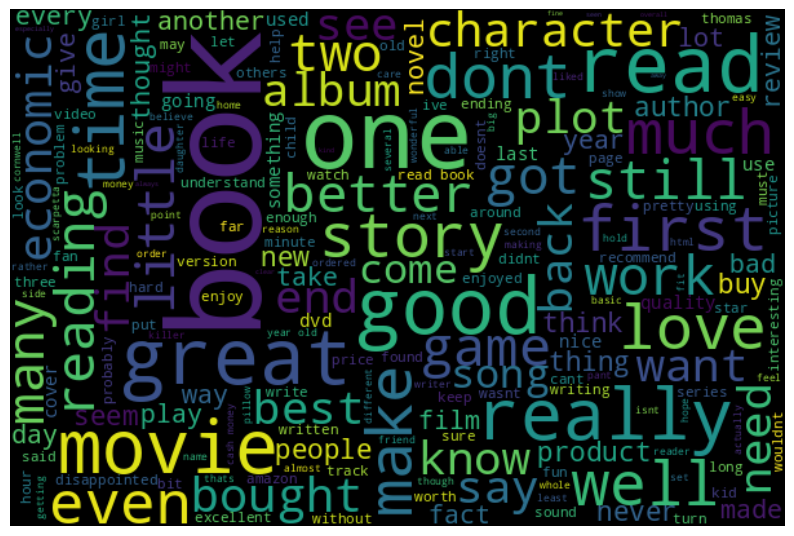

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to plot a word cloud
def plot_wordcloud(words):
    wordcloud = WordCloud(width=600,
                          height=400,
                          random_state=2,
                          max_font_size=100).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Plot the word cloud for the first 20 million words
plot_wordcloud(all_words_review[:20000000])



## Sentiment analysis
